In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import mne

In [3]:
raw = mne.io.read_raw_edf('SC4001E0-PSG (2).edf')
annot = mne.read_annotations('SC4001EC-Hypnogram.edf')
raw.set_annotations(annot,emit_warning=False)

Extracting EDF parameters from C:\Users\HP\project\tutorial\SC4001E0-PSG (2).edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<RawEDF | SC4001E0-PSG (2).edf, 7 x 7950000 (79500.0 s), ~12 kB, data not loaded>

Using matplotlib as 2D backend.


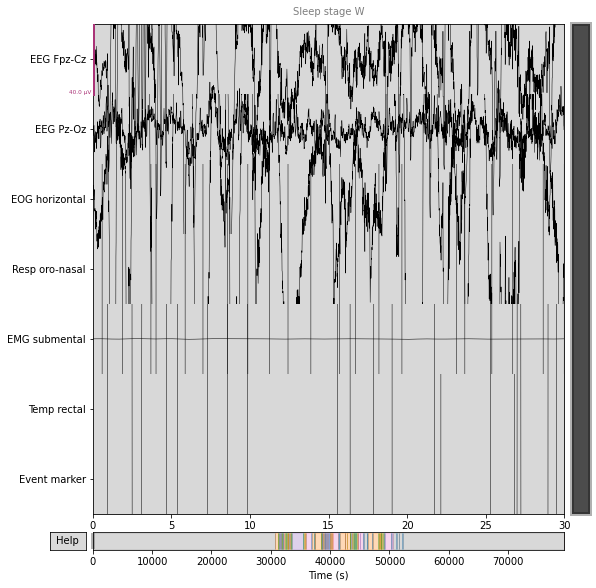

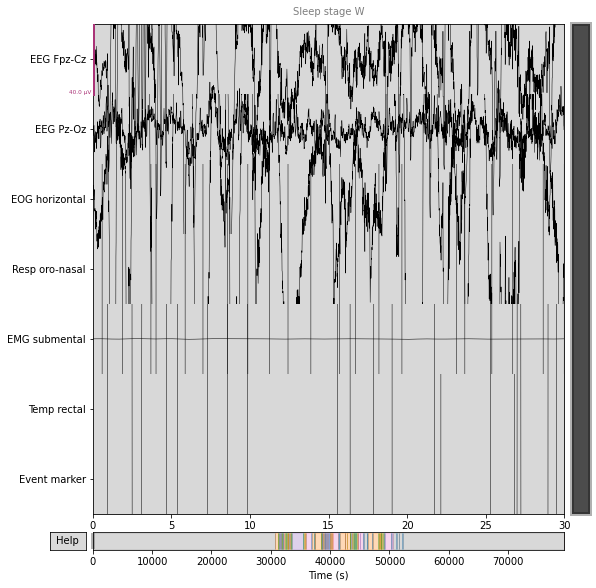

In [4]:
raw.plot(start=0,duration=30)

In [5]:
data = raw.get_data()
df = pd.DataFrame(data)
df = df.transpose()
df

,0,1,2,3,4,5,6
0,0.000005,-2.467399e-06,0.000017,-482.000000,0.000004,37.206452,920.000000
1,-0.000003,1.467399e-06,0.000016,-477.513343,0.000004,37.206154,919.251369
2,0.000001,-4.098901e-06,0.000010,-472.792126,0.000004,37.205865,918.501596
3,-0.000002,-2.659341e-06,0.000002,-467.836265,0.000004,37.205584,917.751318
4,-0.000005,-7.399267e-07,0.000008,-462.645805,0.000004,37.205314,917.001168
...,...,...,...,...,...,...,...
7949995,0.000011,-6.882051e-06,0.000082,120.019895,0.000003,37.430325,884.192595
7949996,0.000004,-8.609524e-06,0.000062,119.233020,0.000003,37.430079,883.955098
7949997,0.000005,-3.043223e-06,0.000070,118.437162,0.000003,37.429827,883.717035
7949998,-0.000005,-3.715018e-06,0.000081,117.632748,0.000003,37.429568,883.478461


In [6]:
annot_df = annot.to_data_frame()
annot_df

,onset,duration,description
0,1970-01-01 00:00:00,30630.0,Sleep stage W
1,1970-01-01 08:30:30,120.0,Sleep stage 1
2,1970-01-01 08:32:30,390.0,Sleep stage 2
3,1970-01-01 08:39:00,30.0,Sleep stage 3
4,1970-01-01 08:39:30,30.0,Sleep stage 2
...,...,...,...
149,1970-01-01 14:19:00,30.0,Sleep stage 1
150,1970-01-01 14:19:30,540.0,Sleep stage W
151,1970-01-01 14:28:30,150.0,Sleep stage 1
152,1970-01-01 14:31:00,27240.0,Sleep stage W


In [7]:
label = {'Sleep stage 1':1,'Sleep stage 2':2,'Sleep stage 3':3,'Sleep stage W':0,'Sleep stage 4':3,'Sleep stage R':4,'Sleep stage ?':-1,'Movement time':-1}
annot_df['description'] = annot_df['description'].replace(label)
annot_df

,onset,duration,description
0,1970-01-01 00:00:00,30630.0,0
1,1970-01-01 08:30:30,120.0,1
2,1970-01-01 08:32:30,390.0,2
3,1970-01-01 08:39:00,30.0,3
4,1970-01-01 08:39:30,30.0,2
...,...,...,...
149,1970-01-01 14:19:00,30.0,1
150,1970-01-01 14:19:30,540.0,0
151,1970-01-01 14:28:30,150.0,1
152,1970-01-01 14:31:00,27240.0,0


In [8]:
annot_df.groupby(['description']).sum()

,duration
description,
-1,6900.0
0,59910.0
1,1740.0
2,7500.0
3,6600.0
4,3750.0


In [9]:
annot_list = []
for i in range(0,153):
    dur = int(annot_df.iloc[i,1])
    des = int(annot_df.iloc[i,2])
    for j in range(0,dur):
        annot_list.append(des)

In [10]:
cols = ['Stages']
annot_list = pd.DataFrame(annot_list,columns=cols)
annot_list

,Stages
0,0
1,0
2,0
3,0
4,0
...,...
79495,0
79496,0
79497,0
79498,0


In [11]:
df = df.iloc[0:79500]
df

,0,1,2,3,4,5,6
0,0.000005,-2.467399e-06,0.000017,-482.000000,0.000004,37.206452,920.000000
1,-0.000003,1.467399e-06,0.000016,-477.513343,0.000004,37.206154,919.251369
2,0.000001,-4.098901e-06,0.000010,-472.792126,0.000004,37.205865,918.501596
3,-0.000002,-2.659341e-06,0.000002,-467.836265,0.000004,37.205584,917.751318
4,-0.000005,-7.399267e-07,0.000008,-462.645805,0.000004,37.205314,917.001168
...,...,...,...,...,...,...,...
79495,0.000033,1.068059e-05,0.000001,189.825492,0.000003,37.253137,905.379169
79496,0.000067,9.145055e-06,0.000002,189.069777,0.000003,37.253041,905.312811
79497,0.000025,7.993407e-06,-0.000031,188.308952,0.000003,37.252948,905.241653
79498,0.000032,7.609524e-06,-0.000053,187.543434,0.000003,37.252859,905.165756


In [12]:
df_stats = df.describe()

In [13]:
df_stats = df_stats.transpose()

In [14]:
df_stats

,count,mean,std,min,25%,50%,75%,max
0,79500.0,1.811138e-07,2.561919e-05,-0.000125,-0.000012,5.157509e-07,0.000013,0.000157
1,79500.0,-3.464879e-07,7.185456e-06,-0.000048,-0.000005,-4.520147e-07,0.000004,0.000056
2,79500.0,7.427894e-07,8.184781e-05,-0.000386,-0.000036,-2.463980e-07,0.000035,0.000445
3,79500.0,2.772545e+02,3.497052e+02,-907.900006,181.378693,2.211806e+02,317.617642,2015.034675
4,79500.0,3.422791e-06,7.126552e-08,0.000003,0.000003,3.422624e-06,0.000003,0.000004
5,79500.0,3.721832e+01,2.517206e-02,37.143711,37.200739,3.721811e+01,37.235538,37.325715
6,79500.0,8.896052e+02,5.765405e+01,-2.770382,879.616700,8.935192e+02,907.264523,1021.897795


In [15]:
def norm(x):
    return (x - df_stats['mean']) / df_stats['std']

df = norm(df)

In [16]:
df

,0,1,2,3,4,5,6
0,0.188754,-0.295167,0.192624,-2.171127,1.813066,-0.471340,0.527193
1,-0.107727,0.252439,0.186603,-2.158298,1.834960,-0.483177,0.514208
2,0.046004,-0.522223,0.108332,-2.144797,1.856496,-0.494663,0.501203
3,-0.100406,-0.321880,0.011998,-2.130625,1.877656,-0.505789,0.488190
4,-0.210214,-0.054755,0.084248,-2.115783,1.898424,-0.516544,0.475179
...,...,...,...,...,...,...,...
79495,1.283172,1.534638,0.005977,-0.250008,0.946352,1.383297,0.273597
79496,2.589885,1.320938,0.011998,-0.252169,0.930013,1.379503,0.272446
79497,0.975710,1.160663,-0.385380,-0.254344,0.913086,1.375822,0.271212
79498,1.250230,1.107238,-0.656320,-0.256533,0.895582,1.372258,0.269895


In [17]:
df.iloc[0,0]

0.18875446192609638

In [18]:
df.iloc[0,1]

-0.2951672478131336

In [19]:
a = annot_list.values

In [20]:
a[40000][0]

2

In [21]:
X0 = []
X1 = []
X2 = []
X3 = []
X4 = []
X5 = []
X6 = []

for i in range(0,79500):
    if(a[i][0] == 2):
        X0.append(df.iloc[i,0])
        X1.append(df.iloc[i,1])
        X2.append(df.iloc[i,2])
        X3.append(df.iloc[i,3])
        X4.append(df.iloc[i,4])
        X5.append(df.iloc[i,5])
        X6.append(df.iloc[i,6])


In [22]:
X0

[0.21803654352688484,
 0.24365836492757476,
 0.1777736813258007,
 0.17045316092560356,
 0.3132033087294473,
 0.08992743652343528,
 -0.012559849079324358,
 0.1777736813258007,
 -0.115047134682084,
 -0.4005474302897715,
 -0.21387416008474505,
 -0.2504767620857306,
 -0.21387416008474505,
 0.020382492721562666,
 0.06430561512274537,
 0.16313264052540646,
 0.8585820785441325,
 -0.744611889099036,
 -0.7958555319004158,
 -0.8397786543015985,
 -1.1069776489087932,
 -0.7482721492991347,
 -0.6567656442966707,
 -0.6494451238964735,
 -0.6677464248969662,
 -0.711669547298149,
 -0.44813081289105283,
 -0.09308557348149266,
 -0.2651178028861249,
 -0.06380349188070417,
 -0.0015790684790286823,
 -0.23583572128533642,
 0.016722232521464108,
 -0.2797588436865191,
 0.11920951812422376,
 -0.08942531328139408,
 0.1777736813258007,
 0.06430561512274537,
 0.21803654352688484,
 0.6536075073386132,
 0.20705576292658917,
 0.23267758432727906,
 0.22535706392708196,
 -0.0088995888792258,
 0.166792900725505,
 0.4779

In [23]:
X1

[0.03873881544122974,
 -0.13489233745103918,
 -0.2951672478131336,
 -0.4420859156450535,
 0.21236996833349867,
 0.05209505797140428,
 -0.3886609455243554,
 -0.3085234903433081,
 -0.01468615467946839,
 -0.9229106467313366,
 0.03873881544122974,
 -0.3886609455243554,
 -0.428729673114879,
 -0.2951672478131336,
 -0.8694856766106385,
 -0.10817985239069013,
 0.012026330380880672,
 0.11887627062227694,
 0.8401133672517018,
 -0.13489233745103918,
 0.31921990857489496,
 -0.37530470299418084,
 -0.09482360986051562,
 0.4127136062861167,
 -0.09482360986051562,
 -0.8961981616709875,
 0.025382572911055213,
 0.5329197890576874,
 -1.6307915008305869,
 -1.0965417996236055,
 0.21236996833349867,
 -0.882841919140813,
 -0.5355796133562751,
 0.21236996833349867,
 -0.3886609455243554,
 -1.2568167099857,
 -0.3085234903433081,
 0.6798384568896073,
 -1.3636666502270962,
 -0.10817985239069013,
 -0.7225670087787187,
 -1.0431168295029074,
 -0.4955108857657516,
 1.0671694902646687,
 0.4127136062861167,
 0.59970100

In [24]:
X2

[0.30100021414081407,
 0.3130419797439434,
 0.33712551095020216,
 0.3672299249580256,
 0.4033552217674138,
 0.30100021414081407,
 0.3612090421564609,
 0.10231108168917943,
 0.3672299249580256,
 0.5057102293940134,
 0.27089580013299064,
 0.18058255810952034,
 0.21670785491890843,
 0.31906286254550814,
 0.28895844853768465,
 0.6803158306393892,
 0.3551881593548962,
 0.21068697211734377,
 0.3612090421564609,
 0.29497933133924936,
 0.6441905338300012,
 0.6201070026237424,
 0.4455014013783665,
 0.6020443542190483,
 0.6261278854253071,
 0.2227287377204731,
 0.7224620102503421,
 0.5117311121955781,
 0.8428796662816357,
 0.6321487682268717,
 0.7284828930519067,
 0.800733486670683,
 0.6381696510284366,
 0.6502114166315659,
 0.8428796662816357,
 0.6803158306393892,
 0.6080652370206131,
 0.7405246586550361,
 0.6742949478378245,
 0.7043993618456481,
 0.5418355262034015,
 0.6682740650362599,
 0.7104202446472128,
 0.5358146434018367,
 0.686336713440954,
 0.6020443542190483,
 0.5418355262034015,
 0.6

In [25]:
X3

[0.28953456423411783,
 0.2892173182720486,
 0.2888924992881256,
 0.2885604144197805,
 0.2882213754814966,
 0.2878756987203428,
 0.2875237045675097,
 0.287165717386035,
 0.28680206521488205,
 0.2864330795095609,
 0.286059094879472,
 0.285680448822159,
 0.28529748145466044,
 0.284910535242152,
 0.28451995472407243,
 0.2841260862379321,
 0.283729277641002,
 0.28332987803008236,
 0.28292823745955864,
 0.2825247066579439,
 0.2821196367431213,
 0.2817133789364868,
 0.28130628427620935,
 0.28089870332981304,
 0.2804909859062993,
 0.2800834807680169,
 0.27967653534249487,
 0.27927049543445764,
 0.2788657049382293,
 0.27846250555074903,
 0.2780612364854094,
 0.2776622341869367,
 0.27726583204752414,
 0.27687236012443756,
 0.27648214485930767,
 0.2760955087993206,
 0.2757127703205238,
 0.27533424335345735,
 0.2749602371113243,
 0.27459105582091053,
 0.2742269984564613,
 0.27386835847672353,
 0.2735154235653622,
 0.27316847537495137,
 0.27282778927474205,
 0.2724936341024109,
 0.27216627191998694

In [26]:
X4

[0.9729108036437704,
 0.9547796978221328,
 0.9362762749402868,
 0.9174073070838498,
 0.8981798245553216,
 0.8786011124060292,
 0.8586787067817346,
 0.8384203910843141,
 0.8178341919517826,
 0.7969283750593469,
 0.7757114407439495,
 0.7541921194555103,
 0.7323793670374495,
 0.7102823598396224,
 0.6879104896669846,
 0.6652733585671837,
 0.6423807734604462,
 0.6192427406154036,
 0.5958694599743825,
 0.5722713193319297,
 0.5484588883705035,
 0.5244429125570739,
 0.5002343069049866,
 0.4758441496048368,
 0.4512836755290111,
 0.42656426961387256,
 0.40169746012411245,
 0.37669491180401643,
 0.35156841891965657,
 0.326329898197245,
 0.3009913816620051,
 0.2755650093825284,
 0.2500630221252944,
 0.22449775392458263,
 0.1988816245724065,
 0.1732271320337169,
 0.14754684479199134,
 0.12185339413017778,
 0.09615946635237062,
 0.07047779495124115,
 0.04482115272671906,
 0.0192023438610063,
 -0.0063658040446746755,
 -0.03187044796607154,
 -0.05729873747965156,
 -0.08263782280828585,
 -0.10787486288

In [27]:
X5

[-0.2928556580886365,
 -0.28026635219697754,
 -0.26837836029538753,
 -0.25719774635685105,
 -0.24673001551481624,
 -0.2369801114510271,
 -0.22795241422398665,
 -0.2196507385465185,
 -0.21207833250649913,
 -0.20523787673443067,
 -0.19913148401503136,
 -0.19376069934284365,
 -0.18912650042101292,
 -0.18522929860380188,
 -0.18206894027521875,
 -0.17964470866799354,
 -0.17795532611584555,
 -0.17699895674130028,
 -0.17677320956663584,
 -0.17727514205614422,
 -0.17850126407728847,
 -0.18044754227934295,
 -0.18310940488415486,
 -0.18648174688817928,
 -0.19055893566195656,
 -0.19533481695324223,
 -0.2008027212762883,
 -0.20695547068755804,
 -0.21378538594702795,
 -0.22128429404051836,
 -0.22944353607603776,
 -0.2382539755374866,
 -0.24770600688471164,
 -0.2577895645010403,
 -0.2684941319727694,
 -0.2798087516969394,
 -0.291722034806385,
 -0.3042221714047225,
 -0.317296941101396,
 -0.33093372383661795,
 -0.3451195109914083,
 -0.35984091676551105,
 -0.37508418982064906,
 -0.39083522517472113,
 -

In [28]:
X6

[0.09176803411126291,
 0.09231536894902015,
 0.09275319083247535,
 0.09307948284988114,
 0.09329232987142207,
 0.09338992090524362,
 0.09337055135549266,
 0.09323262518020814,
 0.09297465694692635,
 0.09259527378396801,
 0.09209321722546851,
 0.09146734494832368,
 0.09071663239929971,
 0.08984017431072822,
 0.08883718610318472,
 0.0877070051737136,
 0.08644909206847506,
 0.08506303153829414,
 0.08354853347625585,
 0.08190543373626973,
 0.0801336948317185,
 0.0782334065134002,
 0.07620478622616803,
 0.07404817944366875,
 0.07176405988077124,
 0.06935302958335213,
 0.06681581889526873,
 0.06415328630237359,
 0.061366418153625604,
 0.058456328259473465,
 0.055424257367668976,
 0.052271572516995456,
 0.048999766269250275,
 0.04561045582024084,
 0.042105381990336165,
 0.03848640809551664,
 0.034755518699756134,
 0.030914818249876113,
 0.02696652959391691,
 0.022912992384355207,
 0.018756661367496714,
 0.014500104560552613,
 0.010146001317904243,
 0.005697140288348502,
 0.001156417264946816,

In [29]:
import scipy.stats as st

In [30]:
st.t.interval(alpha=0.90, df=len(X0)-1,
              loc=np.mean(X0),
              scale=st.sem(X0))

C:\Users\HP\AppData\Local\Temp/ipykernel_17772/717390456.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.90, df=len(X0)-1,


(0.02339118601260716, 0.061319371427594825)

In [31]:
st.t.interval(alpha=0.90, df=len(X1)-1,
              loc=np.mean(X1),
              scale=st.sem(X1))

C:\Users\HP\AppData\Local\Temp/ipykernel_17772/3723661251.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.90, df=len(X1)-1,


(0.012233780382494185, 0.04781662524659355)

In [32]:
st.t.interval(alpha=0.90, df=len(X2)-1,
              loc=np.mean(X2),
              scale=st.sem(X2))

C:\Users\HP\AppData\Local\Temp/ipykernel_17772/2606998258.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.90, df=len(X2)-1,


(-0.05276497160591538, -0.0130757371682527)

In [33]:
st.t.interval(alpha=0.90, df=len(X3)-1,
              loc=np.mean(X3),
              scale=st.sem(X3))

C:\Users\HP\AppData\Local\Temp/ipykernel_17772/3860025406.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.90, df=len(X3)-1,


(-0.050444522552575165, -0.04579950918099312)

In [34]:
st.t.interval(alpha=0.90, df=len(X4)-1,
              loc=np.mean(X4),
              scale=st.sem(X4))

C:\Users\HP\AppData\Local\Temp/ipykernel_17772/1715302051.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.90, df=len(X4)-1,


(-0.21573842683694808, -0.181494611016179)

In [35]:
st.t.interval(alpha=0.90, df=len(X5)-1,
              loc=np.mean(X5),
              scale=st.sem(X5))

C:\Users\HP\AppData\Local\Temp/ipykernel_17772/3134699342.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.90, df=len(X5)-1,


(-0.2458760772644308, -0.2196979244303253)

In [36]:
st.t.interval(alpha=0.90, df=len(X6)-1,
              loc=np.mean(X6),
              scale=st.sem(X6))

C:\Users\HP\AppData\Local\Temp/ipykernel_17772/2686493811.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.90, df=len(X6)-1,


(0.02100233159416602, 0.033861801667309156)